# Movie Plot Synopsis with Tags

## Context
Abstract Social tagging of movies reveals a wide range of heterogeneous information about movies, like the genre, plot structure, soundtracks, metadata, visual and emotional experiences. Such information can be valuable in building automatic systems to create tags for movies. Automatic tagging systems can help recommendation engines to improve the retrieval of similar movies as well as help viewers to know what to expect from a movie in advance. In this paper, we set out to the task of collecting a corpus of movie plot synopses and tags. We describe a methodology that enabled us to build a fine-grained set of around 70 tags exposing heterogeneous characteristics of movie plots and the multi-label associations of these tags with some 14K movie plot synopses. We investigate how these tags correlate with movies and the flow of emotions throughout different types of movies. Finally, we use this corpus to explore the feasibility of inferring tags from plot synopses. We expect the corpus will be useful in other tasks where analysis of narratives is relevant.

## Content
Please find the paper here: https://www.aclweb.org/anthology/L18-1274

This dataset was published in LREC 2018@Miyazaki, Japan.

Keywords Tag generation for movies, Movie plot analysis, Multi-label dataset, Narrative texts

More information is available here http://ritual.uh.edu/mpst-2018/

Please use the following BibTex​ to cite the work.

@InProceedings{KAR18.332, author = {Sudipta Kar and Suraj Maharjan and A. Pastor López-Monroy and Thamar Solorio}, title = {{MPST}: A Corpus of Movie Plot Synopses with Tags}, booktitle = {Proceedings of the Eleventh International Conference on Language Resources and Evaluation (LREC 2018)}, year = {2018}, month = {May}, date = {7-12}, location = {Miyazaki, Japan}, editor = {Nicoletta Calzolari (Conference chair) and Khalid Choukri and Christopher Cieri and Thierry Declerck and Sara Goggi and Koiti Hasida and Hitoshi Isahara and Bente Maegaard and Joseph Mariani and Hélène Mazo and Asuncion Moreno and Jan Odijk and Stelios Piperidis and Takenobu Tokunaga}, publisher = {European Language Resources Association (ELRA)}, address = {Paris, France}, isbn = {979-10-95546-00-9}, language = {english} }

## Acknowledgements
We would like to thank the National Science Foundation for partially funding this work under award 1462141. We are also grateful to Prasha Shrestha, Giovanni Molina, Deepthi Mave, and Gustavo Aguilar for reviewing and providing valuable feedback during the process of creating tag clusters

## Problem Statement

Predict tags for a movie using synopsis

# Machine learning problem

### Data

https://www.kaggle.com/cryptexcode/mpst-movie-plot-synopses-with-tags/activity

### Data overview-

Its consist of movie id , movie title, synopsis,tags,source

## Type of Machine Learning Problem
It is a multi-label classification problem Multi-label Classification: Multilabel classification as-
signs to each sample a set of target labels. This can be thought as predicting properties of a data-
point that are not mutually exclusive, such as topics that are relevant for a document.

### Performance metric
> <u><b>1.Micro-Averaged F1-Score (Mean F Score) :</u></b> The F1 score can be interpreted as a weighted aver-
age of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
The relative contribution of precision and recall to the F1 score are equal. The formula for the F1
score is:
2F1 = 2 * (precision * recall) / (precision + recall)
In the multi-class and multi-label case, this is the weighted average of the F1 score of each
class.

> <u><b>2.Micro f1 score’:</u></b> Calculate metrics globally by counting the total true positives, false negatives
and false positives. This is a better metric when we have class imbalance.
’Macro f1 score’: Calculate metrics for each label, and find their unweighted mean. This does
not take label imbalance into account

#### Importing pre-requiste package

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import tqdm
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
import os
import seaborn as sns
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = pd.read_csv('mpst_full_data.csv')

## EDA

In [3]:
data.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


In [4]:
print("Number of datapoints:",data.shape[0])
print("Number of features:",data.shape[1])

Number of datapoints: 14828
Number of features: 6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 6 columns):
imdb_id            14828 non-null object
title              14828 non-null object
plot_synopsis      14828 non-null object
tags               14828 non-null object
split              14828 non-null object
synopsis_source    14828 non-null object
dtypes: object(6)
memory usage: 695.1+ KB


### Adding polarity feature to our data

Here polariyt tells abt which text is positive and negative i.e text is abt violence or it is abt romantic,positivity 

In [7]:
from textblob import TextBlob
def get_polarity(text):
    try:
        pol = TextBlob(text).sentiment.polarity
    except:
        pol = 0.0
    return pol

In [8]:
data['polarity'] = data['plot_synopsis'].apply(get_polarity)

In [9]:
from datetime import datetime

start = datetime.now()
data['tags_count'] =data.tags.apply(lambda text: len(text.split(" ")))
print("Time taken to run the cell:",datetime.now() - start)

data.head()

Time taken to run the cell: 0:00:00.008520


,imdb_id,title,plot_synopsis,tags,split,synopsis_source,polarity,tags_count
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,0.073613,5
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,-0.043939,1
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,0.005330,1
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,0.117596,4
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,0.009198,10


In [14]:
data.tags_count.value_counts()

1     5171
2     2997
3     1926
4     1318
5      960
6      661
7      492
8      374
9      252
10     191
11     136
12     100
13      70
14      44
15      35
16      31
17      21
18      18
20      11
19       8
21       3
26       2
27       2
22       2
23       2
24       1
Name: tags_count, dtype: int64

In [15]:
data.isna().sum()

imdb_id            0
title              0
plot_synopsis      0
tags               0
split              0
synopsis_source    0
polarity           0
tags_count         0
dtype: int64

> As we can see there is no NaN value in data

In [16]:
data.duplicated().sum()

0

<b>As we can see there is duplicated data</b>

In [17]:
data.tags.unique()

array(['cult, horror, gothic, murder, atmospheric', 'violence',
       'romantic', ..., 'violence, romantic, historical fiction',
       'suspenseful, neo noir, violence, tragedy, revenge, sentimental',
       'neo noir, realism, murder, violence, atmospheric, suspenseful'],
      dtype=object)

In [18]:
data.describe()

,polarity,tags_count
count,14828.000000,14828.000000
mean,0.030277,3.248854
std,0.076196,2.932064
min,-0.444259,1.000000
25%,-0.016703,1.000000
50%,0.027273,2.000000
75%,0.074294,4.000000
max,0.434854,27.000000


Here we can see that minimum tag is 1 for a movie and maximum is 27 for a movie and our average per movie tag is 1

## Analysis of Tags 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
tags_cnt = vectorizer.fit_transform(data.tags)

In [20]:
print("Number of unique tags are {} and number of datapoints are {}".format(tags_cnt.shape[1],tags_cnt.shape[0]))

Number of unique tags are 82 and number of datapoints are 14828


In [21]:
tags= vectorizer.get_feature_names()
print("For example we have tags like :",tags[:82])

For example we have tags like : ['absurd', 'action', 'adult', 'allegory', 'alternate', 'anti', 'atmospheric', 'autobiographical', 'avant', 'blaxploitation', 'bleak', 'boring', 'brainwashing', 'christian', 'claustrophobic', 'clever', 'comedy', 'comic', 'cruelty', 'cult', 'cute', 'dark', 'depressing', 'dramatic', 'entertaining', 'evil', 'fantasy', 'feel', 'fi', 'fiction', 'film', 'flashback', 'garde', 'good', 'gothic', 'grindhouse', 'haunting', 'historical', 'history', 'home', 'horror', 'humor', 'insanity', 'inspiring', 'intrigue', 'magical', 'melodrama', 'movie', 'murder', 'mystery', 'neo', 'noir', 'non', 'paranormal', 'philosophical', 'plot', 'pornographic', 'prank', 'provoking', 'psychedelic', 'psychological', 'queer', 'realism', 'reality', 'revenge', 'romantic', 'sadist', 'satire', 'sci', 'sentimental', 'storytelling', 'stupid', 'suicidal', 'suspenseful', 'thought', 'tragedy', 'twist', 'versus', 'violence', 'war', 'western', 'whimsical']


In [22]:
freqs = tags_cnt.sum(axis=0).A1
result = dict(zip(tags,freqs))

In [23]:
#saving the file in csv
import os
import csv

if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()
        

,Tags,Counts
0,absurd,270
1,action,664
2,adult,128
3,allegory,139
4,alternate,307


In [24]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

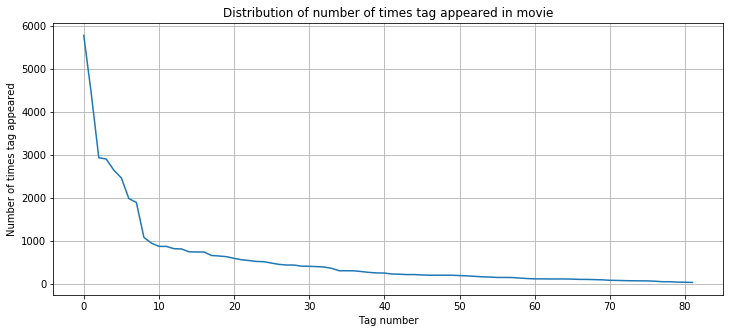

In [25]:
plt.figure(figsize=(12,5))
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared in movie")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

> Here we can clearly see that few tag are more repeated and few around 1 

In [22]:
#Storing the count of tag in each movie in list 'tag_count'
tag_quest_count = tags_cnt.sum(axis=1).tolist()
#Converting list of lists into single list, we will get [[3], [4], [2], [2], [3]] and w
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))
print(tag_quest_count[:5])

We have total 14828 datapoints.
[5, 1, 1, 5, 10]


In [23]:
print( "Maximum number of tags per movie: %d"%max(tag_quest_count))
print( "Minimum number of tags per movie: %d"%min(tag_quest_count))
print( "Avg. number of tags per movie: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per movie: 28
Minimum number of tags per movie: 1
Avg. number of tags per movie: 3.282911


In [ ]:
rowSums = data.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

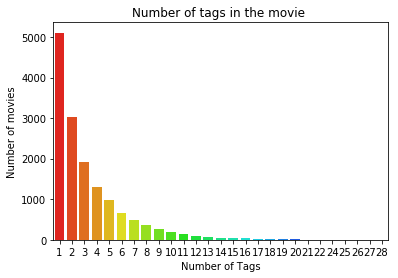

In [24]:
import seaborn as sns

sns.countplot(tag_quest_count, palette='gist_rainbow',)
plt.title("Number of tags in the movie ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of movies")
plt.show()

> As we can see there few tags which are repeated more times and there are some features which have zero times frequency

## Most Frequent tags

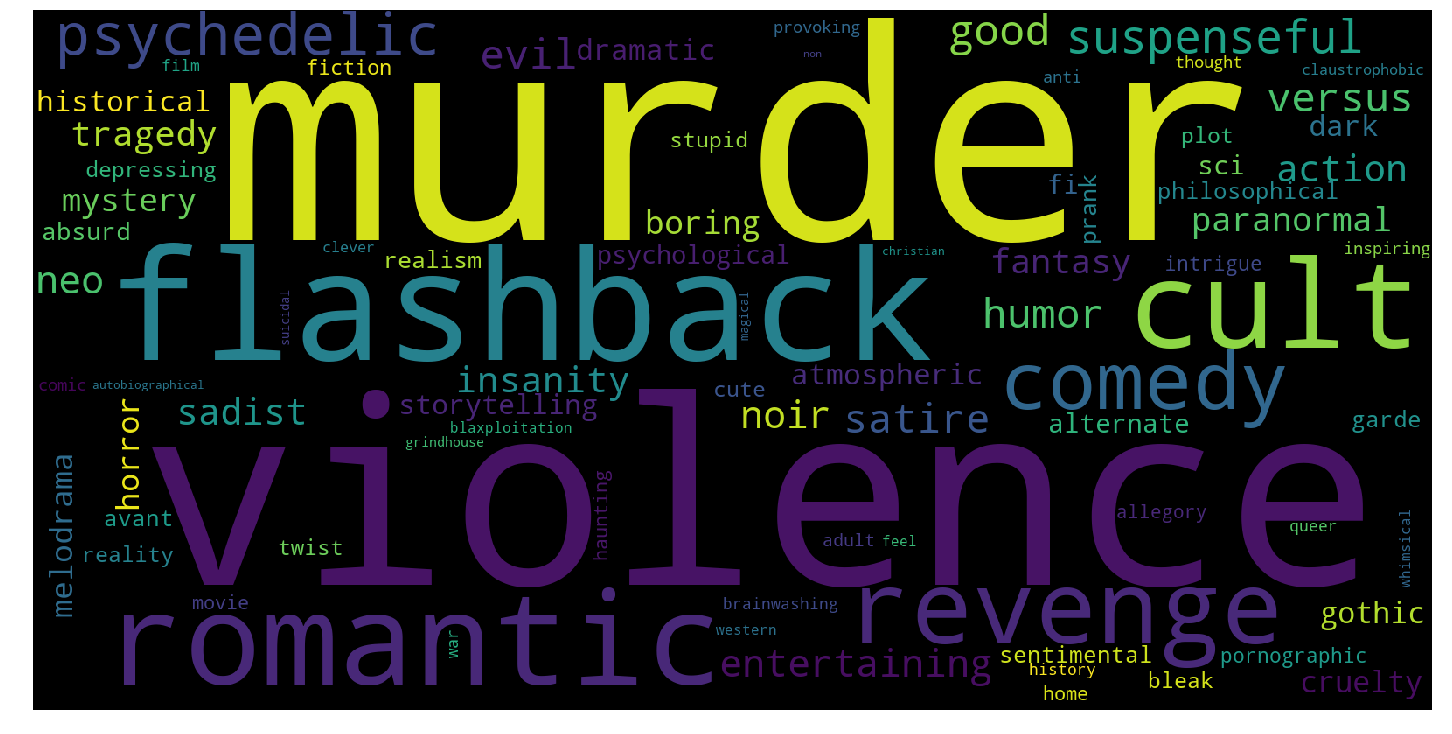

Time taken to run this cell : 0:00:02.080418


In [25]:
from wordcloud import WordCloud

# Ploting word cloud
start = datetime.now()
# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(background_color='black',width=1600,height=800,).generate_from_frequencies(tup)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

> <b>So by plotting wordcloud we can make observation that ther are some tags like murder,flashback,violence are repeated more times</b>

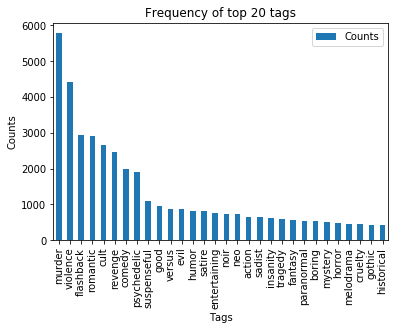

In [26]:
import numpy as np

i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

In [27]:
data.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,polarity,tags_count
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,0.073613,5
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,-0.043939,1
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,0.005330,1
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,0.117596,4
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,0.009198,10


In [118]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk

stop_words = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

In [119]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

In [122]:
final_string=[]
for sent in (data['plot_synopsis']):
    filtered_sentence=[]
#print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        

        if(w.lower() not in stop_words):
            s=w.lower().encode('utf8')
            filtered_sentence.append(s)
    str1 = b" ".join(filtered_sentence) 

    final_string.append(str1)
data['Cleaned_sysnopsis2']=final_string #adding a column of CleanedText which displays the d
data['Cleaned_sysnopsis2']=data['Cleaned_sysnopsis2'].str.decode("utf-8")

In [123]:
data.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,polarity,tags_count,pos,verb_text,verb_new,Cleaned_sysnopsis2
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,0.073613,5,"[VERB, PUNCT, DET, NOUN, VERB, ADP, DET, ADJ, ...","[Note, :, this, synopsis, is, for, the, orgina...","[[Note], [is], [introduces], [known], [is], [p...",note: synopsis orginal italian release segment...
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,-0.043939,1,"[NUM, NUM, NOUN, ADV, PUNCT, PROPN, DET, PROPN...","[Two, thousand, years, ago, ,, Nhagruul, the, ...","[[reveled], [corrupting], [neared], [was], [di...","two thousand years ago, nhagruul foul, sorcere..."
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,0.005330,1,"[PROPN, PART, PUNCT, DET, NOUN, NOUN, ADP, PRO...","[Matuschek, 's, ,, a, gift, store, in, Budapes...","[[is], [irritate], [is], [tempered], [has], [t...","matuschek's, gift store budapest, workplace al..."
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,0.117596,4,"[PROPN, PROPN, PUNCT, ADV, DET, NOUN, NOUN, AD...","[Glenn, Holland, ,, not, a, morning, person, b...","[[is], [woken], [has], [taken], [renamed], [in...","glenn holland, morning person anyone's standar..."
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,0.009198,10,"[ADP, PROPN, NUM, PUNCT, DET, ADJ, NOUN, VERB,...","[In, May, 1980, ,, a, Cuban, man, named, Tony,...","[[named], [claims], [is], [departing], [questi...","may 1980, cuban man named tony montana (al pac..."


In [124]:
import tqdm
import spacy
import numpy as np
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

start = datetime.now()

final_string_pos = []
verb_string_text = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in (data['Cleaned_sysnopsis2']):
    str1=[]
    pos=[]
    verb_text=[]
    doc = nlp(qu1)
    for token in doc:
        x= token.pos_
        pos.append(x)
        text =token.text
        verb_text.append(text)
#         print("sentence",text)
#         for i,part_of_speech in enumerate(x.split(',')):
#             print(i,part_of_speech)
#             if part_of_speech == 'VERB':  
#                 print('Verb found')
#                 print('verb in text',verb_text[i])
#                 text =token.text
#                 print("sentence",text)
#                 for j,verb_text in enumerate(text.split(',')):
                    
#                     print(verb_text)
#                     verb_token.append(verb_text[i])
                
#     str1(pos)
    final_string_pos.append(pos)
    verb_string_text.append(verb_text)
data['pos']=final_string_pos #adding a column of CleanedText which displays the d
# data['pos']=data['pos'].str.decode("utf-8")

data['verb_text'] = verb_string_text
# data['verb_text'] = data['verb_text'].str.decode('utf-8')

print("Time taken:",datetime.now() - start)

Time taken: 0:16:06.204096


In [125]:
data.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,polarity,tags_count,pos,verb_text,verb_new,Cleaned_sysnopsis2
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,0.073613,5,"[NOUN, PUNCT, VERB, ADJ, ADJ, NOUN, VERB, ADJ,...","[note, :, synopsis, orginal, italian, release,...","[[Note], [is], [introduces], [known], [is], [p...",note: synopsis orginal italian release segment...
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,-0.043939,1,"[NUM, NUM, NOUN, ADV, PUNCT, NOUN, ADV, PUNCT,...","[two, thousand, years, ago, ,, nhagruul, foul,...","[[reveled], [corrupting], [neared], [was], [di...","two thousand years ago, nhagruul foul, sorcere..."
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,0.005330,1,"[PROPN, PART, PUNCT, NOUN, NOUN, ADJ, PUNCT, N...","[matuschek, 's, ,, gift, store, budapest, ,, w...","[[is], [irritate], [is], [tempered], [has], [t...","matuschek's, gift store budapest, workplace al..."
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,0.117596,4,"[NOUN, NOUN, PUNCT, NOUN, NOUN, NOUN, PART, NO...","[glenn, holland, ,, morning, person, anyone, '...","[[is], [woken], [has], [taken], [renamed], [in...","glenn holland, morning person anyone's standar..."
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,0.009198,10,"[VERB, NUM, PUNCT, ADJ, NOUN, VERB, ADJ, NOUN,...","[may, 1980, ,, cuban, man, named, tony, montan...","[[named], [claims], [is], [departing], [questi...","may 1980, cuban man named tony montana (al pac..."


In [132]:
verb_text=[]
for x,y in zip(list(data['verb_text']),data['pos']):
    pos_text=[]
    for i,pos in enumerate(y):
        if pos=='VERB':
#             print(x[i],i)
            pos_text.append(x[i])
#             for j,verb_ in enumerate(list(x)):
#                 print(j)
    str1 = ", ".join(pos_text)
    verb_text.append(str1)
    
data['verb_new']=verb_text    

In [133]:
data.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,polarity,tags_count,pos,verb_text,verb_new,Cleaned_sysnopsis2
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,0.073613,5,"[NOUN, PUNCT, VERB, ADJ, ADJ, NOUN, VERB, ADJ,...","[note, :, synopsis, orginal, italian, release,...","synopsis, segments, known, fear'.the, priced, ...",note: synopsis orginal italian release segment...
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,-0.043939,1,"[NUM, NUM, NOUN, ADV, PUNCT, NOUN, ADV, PUNCT,...","[two, thousand, years, ago, ,, nhagruul, foul,...","reveled, corrupting, neared, dismayed, consume...","two thousand years ago, nhagruul foul, sorcere..."
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,0.005330,1,"[PROPN, PART, PUNCT, NOUN, NOUN, ADJ, PUNCT, N...","[matuschek, 's, ,, gift, store, budapest, ,, w...","hi, irritate, tempered, searching, sent, work,...","matuschek's, gift store budapest, workplace al..."
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,0.117596,4,"[NOUN, NOUN, PUNCT, NOUN, NOUN, NOUN, PART, NO...","[glenn, holland, ,, morning, person, anyone, '...","woken, taken, renamed, intends, hopes, finds, ...","glenn holland, morning person anyone's standar..."
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,0.009198,10,"[VERB, NUM, PUNCT, ADJ, NOUN, VERB, ADJ, NOUN,...","[may, 1980, ,, cuban, man, named, tony, montan...","may, named, claims, departing, questioned, tal...","may 1980, cuban man named tony montana (al pac..."


## Cleaning and Pre-processing of tags

## 1.Pre-processing

In [135]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk

stop_words = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

In [136]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

In [137]:
def cleanpunc(sentence): #function to clean the word of any punctuation or special char
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned

In [138]:
final_string=[]
for sent in (data['plot_synopsis']):
    filtered_sentence=[]
#print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if(cleaned_words.lower() not in stop_words):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
    str1 = b" ".join(filtered_sentence) 

    final_string.append(str1)
data['Cleaned_sysnopsis']=final_string #adding a column of CleanedText which displays the d
data['Cleaned_sysnopsis']=data['Cleaned_sysnopsis'].str.decode("utf-8")

In [139]:
data.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,polarity,tags_count,pos,verb_text,verb_new,Cleaned_sysnopsis2,Cleaned_sysnopsis
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,0.073613,5,"[NOUN, PUNCT, VERB, ADJ, ADJ, NOUN, VERB, ADJ,...","[note, :, synopsis, orginal, italian, release,...","synopsis, segments, known, fear'.the, priced, ...",note: synopsis orginal italian release segment...,synopsi orgin italian releas segment certain o...
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,-0.043939,1,"[NUM, NUM, NOUN, ADV, PUNCT, NOUN, ADV, PUNCT,...","[two, thousand, years, ago, ,, nhagruul, foul,...","reveled, corrupting, neared, dismayed, consume...","two thousand years ago, nhagruul foul, sorcere...",two thousand year ago nhagruul foul sorcer rev...
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,0.005330,1,"[PROPN, PART, PUNCT, NOUN, NOUN, ADJ, PUNCT, N...","[matuschek, 's, ,, gift, store, budapest, ,, w...","hi, irritate, tempered, searching, sent, work,...","matuschek's, gift store budapest, workplace al...",matuschek gift store budapest workplac alfr kr...
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,0.117596,4,"[NOUN, NOUN, PUNCT, NOUN, NOUN, NOUN, PART, NO...","[glenn, holland, ,, morning, person, anyone, '...","woken, taken, renamed, intends, hopes, finds, ...","glenn holland, morning person anyone's standar...",glenn holland morn person anyon standard woken...
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,0.009198,10,"[VERB, NUM, PUNCT, ADJ, NOUN, VERB, ADJ, NOUN,...","[may, 1980, ,, cuban, man, named, tony, montan...","may, named, claims, departing, questioned, tal...","may 1980, cuban man named tony montana (al pac...",may cuban man name toni montana pacino claim a...


In [140]:
import pickle
data.to_pickle('./movie_data.csv')

In [33]:
import pickle
movie_data = pd.read_pickle('./movie_data.csv')

In [34]:
movie_data.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,polarity,tags_count,pos,verb_text,verb_new,Cleaned_sysnopsis2,Cleaned_sysnopsis
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,0.073613,5,"[NOUN, PUNCT, VERB, ADJ, ADJ, NOUN, VERB, ADJ,...","[note, :, synopsis, orginal, italian, release,...","synopsis, segments, known, fear'.the, priced, ...",note: synopsis orginal italian release segment...,synopsi orgin italian releas segment certain o...
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,-0.043939,1,"[NUM, NUM, NOUN, ADV, PUNCT, NOUN, ADV, PUNCT,...","[two, thousand, years, ago, ,, nhagruul, foul,...","reveled, corrupting, neared, dismayed, consume...","two thousand years ago, nhagruul foul, sorcere...",two thousand year ago nhagruul foul sorcer rev...
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,0.005330,1,"[PROPN, PART, PUNCT, NOUN, NOUN, ADJ, PUNCT, N...","[matuschek, 's, ,, gift, store, budapest, ,, w...","hi, irritate, tempered, searching, sent, work,...","matuschek's, gift store budapest, workplace al...",matuschek gift store budapest workplac alfr kr...
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,0.117596,4,"[NOUN, NOUN, PUNCT, NOUN, NOUN, NOUN, PART, NO...","[glenn, holland, ,, morning, person, anyone, '...","woken, taken, renamed, intends, hopes, finds, ...","glenn holland, morning person anyone's standar...",glenn holland morn person anyon standard woken...
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,0.009198,10,"[VERB, NUM, PUNCT, ADJ, NOUN, VERB, ADJ, NOUN,...","[may, 1980, ,, cuban, man, named, tony, montan...","may, named, claims, departing, questioned, tal...","may 1980, cuban man named tony montana (al pac...",may cuban man name toni montana pacino claim a...


In [35]:
final_data_polarity=movie_data.drop(['imdb_id','title','pos','verb_text','Cleaned_sysnopsis2','plot_synopsis','split','synopsis_source','tags_count'],axis=1)

In [36]:
final_data_polarity.head()

,tags,polarity,verb_new,Cleaned_sysnopsis
0,"cult, horror, gothic, murder, atmospheric",0.073613,"synopsis, segments, known, fear'.the, priced, ...",synopsi orgin italian releas segment certain o...
1,violence,-0.043939,"reveled, corrupting, neared, dismayed, consume...",two thousand year ago nhagruul foul sorcer rev...
2,romantic,0.005330,"hi, irritate, tempered, searching, sent, work,...",matuschek gift store budapest workplac alfr kr...
3,"inspiring, romantic, stupid, feel-good",0.117596,"woken, taken, renamed, intends, hopes, finds, ...",glenn holland morn person anyon standard woken...
4,"cruelty, murder, dramatic, cult, violence, atm...",0.009198,"may, named, claims, departing, questioned, tal...",may cuban man name toni montana pacino claim a...


In [7]:
import pickle

Topic_modeling_keywords = pd.read_pickle('./Topic_modeling_keywords.csv')
Topic_modeling_keywords.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.5724,"tell, house, try, find, take, night, woman, po...","[synopsis, orginal, italian, release, segment,..."
1,1,3.0,0.9940,"return, attack, power, kill, become, world, es...","[thousand, years, nhagruul, sorcerer, revel, c..."
2,2,0.0,0.1110,"david, scott, robin, arthur, batman, chris, ha...","[matuschek, store, budapest, workplace, alfred..."
3,3,0.0,0.0232,"david, scott, robin, arthur, batman, chris, ha...","[glenn, holland, morning, person, anyone, stan..."
4,4,1.0,0.2531,"kill, escape, force, order, attack, take, arri...","[cuban, name, montana, pacino, claim, asylum, ..."


In [8]:
topic_keywords = Topic_modeling_keywords.drop(['Document_No','Dominant_Topic','Topic_Perc_Contrib','Text'],axis=1)

In [9]:
topic_keywords.head()

,Keywords
0,"tell, house, try, find, take, night, woman, po..."
1,"return, attack, power, kill, become, world, es..."
2,"david, scott, robin, arthur, batman, chris, ha..."
3,"david, scott, robin, arthur, batman, chris, ha..."
4,"kill, escape, force, order, attack, take, arri..."


In [10]:
topic_keywords.shape

(14828, 1)

### Splitting data into X and Y

In [37]:
Y=final_data_polarity['tags']

In [38]:
X= final_data_polarity.drop(['tags'],axis=1)

In [39]:
X.head()

,polarity,verb_new,Cleaned_sysnopsis
0,0.073613,"synopsis, segments, known, fear'.the, priced, ...",synopsi orgin italian releas segment certain o...
1,-0.043939,"reveled, corrupting, neared, dismayed, consume...",two thousand year ago nhagruul foul sorcer rev...
2,0.005330,"hi, irritate, tempered, searching, sent, work,...",matuschek gift store budapest workplac alfr kr...
3,0.117596,"woken, taken, renamed, intends, hopes, finds, ...",glenn holland morn person anyon standard woken...
4,0.009198,"may, named, claims, departing, questioned, tal...",may cuban man name toni montana pacino claim a...


In [40]:
X.shape

(14828, 3)

In [41]:
final_x = pd.concat([X, topic_keywords],axis=1)

In [42]:
final_x.head()

,polarity,verb_new,Cleaned_sysnopsis,Keywords
0,0.073613,"synopsis, segments, known, fear'.the, priced, ...",synopsi orgin italian releas segment certain o...,"tell, house, try, find, take, night, woman, po..."
1,-0.043939,"reveled, corrupting, neared, dismayed, consume...",two thousand year ago nhagruul foul sorcer rev...,"return, attack, power, kill, become, world, es..."
2,0.005330,"hi, irritate, tempered, searching, sent, work,...",matuschek gift store budapest workplac alfr kr...,"david, scott, robin, arthur, batman, chris, ha..."
3,0.117596,"woken, taken, renamed, intends, hopes, finds, ...",glenn holland morn person anyon standard woken...,"david, scott, robin, arthur, batman, chris, ha..."
4,0.009198,"may, named, claims, departing, questioned, tal...",may cuban man name toni montana pacino claim a...,"kill, escape, force, order, attack, take, arri..."


# Machine learning Models

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
multilabel_y = vectorizer.fit_transform(Y)

In [44]:
t = multilabel_y.sum(axis=0).tolist()[0]
sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
multilabel_yn=multilabel_y[:,sorted_tags_i]

In [45]:
multilabel_yn.shape

(14828, 82)

### Splitting data into train and test

In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(final_x,multilabel_yn,test_size=0.2)

In [47]:
print("training size {} and testing size {} ".format(x_train.shape,x_test.shape))

training size (11862, 4) and testing size (2966, 4) 


In [48]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (11862, 82)
Number of data points in test data : (2966, 82)


## Featurizing the data

In [49]:
from datetime import datetime

start = datetime.now()
vectorizer = TfidfVectorizer(smooth_idf=True,max_features=10000, norm="l2",sublinear_tf=False,ngram_range=(1,3))
x_train1 = vectorizer.fit_transform(x_train['Cleaned_sysnopsis'])
x_test_1 = vectorizer.transform(x_test['Cleaned_sysnopsis'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:01:07.774074


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer2 = CountVectorizer()
x_train_keywords = vectorizer2.fit_transform(x_train['Keywords'])
x_test_keywords = vectorizer2.transform(x_test['Keywords'])

In [51]:
x_train_keywords.shape

(11862, 40)

In [52]:
x_train_verb = vectorizer2.fit_transform(x_train['verb_new'])
x_test_verb = vectorizer2.transform(x_test['verb_new'])

#### Combining our polarity feature

In [54]:
x_train_p = x_train.drop(['Cleaned_sysnopsis','verb_new','Keywords'],axis=1)

In [55]:
x_test_p = x_test.drop(['Cleaned_sysnopsis','verb_new','Keywords'],axis=1)

In [57]:
from scipy.sparse import hstack
# Combine all the features in question1 and question2
final_xtrain = hstack((x_train1,x_train_p,x_train_keywords,x_train_verb))

In [58]:
final_xtest=hstack((x_test_1,x_test_p,x_test_keywords,x_test_verb))

In [59]:
final_xtrain.shape

(11862, 42967)

In [60]:
final_xtest.shape

(2966, 42967)

## Featurizing data for Glove vector

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,multilabel_yn,test_size=0.2)

In [44]:
# dict key:word and value:tf-idf score
# vectorizer = TfidfVectorizer(smooth_idf=True,max_features=40000, norm="l2",sublinear_tf=False,ngram_range=(1,3))
word2tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

Here we are using pre-trained glove model which comes with spacy

In [55]:
import spacy
import numpy as np
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

start = datetime.now()

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in (x_train['Cleaned_sysnopsis']):
#     print(qu1)
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
    
x_train_w2v = list(vecs1)
print("Time taken to run this cell:",datetime.now() - start)

Time taken to run this cell: 0:15:20.872740


In [58]:
nlp = spacy.load('en_core_web_sm')

start = datetime.now()

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in (x_test['Cleaned_sysnopsis']):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
x_test_w2v = list(vecs1)
print("Time taken to run this cell:",datetime.now() - start)

Time taken to run this cell: 0:03:54.200935


In [59]:
#dumping into pickle file
import pickle

with open("x_train_w2v10k.txt", "wb") as fp:   #Pickling
    pickle.dump(x_train_w2v, fp)
    
    
with open("x_test_w2v.txt10k","wb") as fp:
    pickle.dump(x_test_w2v,fp)

# Machine learning models

## 1.Applying model with synopsis feature and polraity

### Applying logistic Regression with OneVsRest Classifier

In [26]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
import warnings 
warnings.filterwarnings('ignore')

Taking random value of alpha=0.00001

In [35]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=0.00001,penalty='l1',n_jobs=-1))
classifier.fit(final_xtrain, y_train)


OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [36]:
predictions = classifier.predict_proba(final_xtest)

In [37]:
t = 0.2 # threshold value
y_pred_new = (predictions >= t).astype(int)

In [38]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred_new))
print("Hamming loss ",metrics.hamming_loss(y_test,y_pred_new))
precision = precision_score(y_test, y_pred_new, average='micro')
recall = recall_score(y_test, y_pred_new, average='micro')
f1 = f1_score(y_test, y_pred_new, average='micro')
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall,f1))
precision = precision_score(y_test, y_pred_new, average='macro')
recall = recall_score(y_test, y_pred_new, average='macro')
f1 = f1_score(y_test, y_pred_new, average='macro')
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall,f1))
# print (metrics.classification_report(y_test, predictions))
# print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.030681051921780174
Hamming loss  0.05900613456572867
Micro-average quality numbers
Precision: 0.3831, Recall: 0.3927, F1-measure: 0.3878
Macro-average quality numbers
Precision: 0.2824, Recall: 0.3712, F1-measure: 0.3207


> So we are getting test F1 score of 0.3878 with a random alpha value and lets try with hypermater tunning with various alpha value

## Perfroming Hypermater tuning

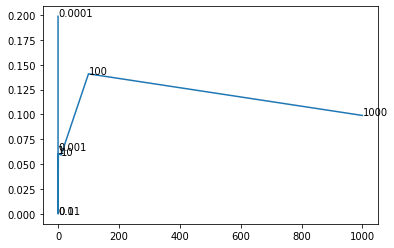


The best value of alpha is 0.0001.
Time taken to run this cell : 0:02:35.692269


In [39]:
# import sklearn.model_selection import cross_val_score
import numpy as np
import sklearn

start = datetime.now()
alpha_lst = [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]
micro_f1_scores = []
for alpha_ in alpha_lst:
    classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=alpha_, penalty='l1'))
    cv_scores = sklearn.model_selection.cross_val_score(classifier,final_xtrain, y_train, cv=3, scoring='f1_micro')
    micro_f1_scores.append(cv_scores.mean())
                                                   
# plot alpha vs micro f1 score
plt.plot(alpha_lst,micro_f1_scores)
for i in range (0,len(alpha_lst)):
    plt.annotate('%s' %alpha_lst[i], xy=(alpha_lst[i],micro_f1_scores[i]))
plt.show()
best_alpha = alpha_lst[np.argmax(micro_f1_scores)]
print('\nThe best value of alpha is %s.' %best_alpha)
print("Time taken to run this cell :", datetime.now() - start)

In [40]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'))
classifier.fit(final_xtrain, y_train)
predictions = classifier.predict_proba(final_xtest)

t = 0.2 # threshold value
y_pred_new = (predictions >= t).astype(int)

precision = precision_score(y_test, y_pred_new, average='micro')
recall = recall_score(y_test, y_pred_new, average='micro')
f1 = f1_score(y_test, y_pred_new, average='micro')

print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print("Time taken to run this cell :", datetime.now() - start)

Micro-average quality numbers
Precision: 0.3827, Recall: 0.3925, F1-measure: 0.3875
Time taken to run this cell : 0:00:24.514953


> As we can see we are getting f1 score value of 0.3875 

## Applying SVM

In [41]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l2'), n_jobs=-1)
classifier.fit(final_xtrain, y_train)
predictions = classifier.predict (final_xtest)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.05529332434254889
Hamming loss  0.04560630232060918
Micro-average quality numbers
Precision: 0.3938, Recall: 0.3505, F1-measure: 0.3708


> As we can see we are getting f1 score of 0.3708 which is less then the logistic Regression

# Word2Vec

In [60]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

In [63]:
#Adding some feature

final_x_train_w2v = hstack((x_train_w2v,x_train_p))
final_x_test_w2v = hstack((x_test_w2v,x_test_p))

In [64]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=0.00001,penalty='l1',n_jobs=4))
classifier.fit(final_x_train_w2v, y_train)

predictions = classifier.predict(final_x_test_w2v)

In [72]:
t = 0.2 # threshold value
y_pred_new = (predictions >= t).astype(int)

In [73]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred_new))
print("Hamming loss ",metrics.hamming_loss(y_test,y_pred_new))
precision = precision_score(y_test, y_pred_new, average='micro')
recall = recall_score(y_test, y_pred_new, average='micro')
f1 = f1_score(y_test, y_pred_new, average='micro')
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall,f1))
precision = precision_score(y_test, y_pred_new, average='macro')
recall = recall_score(y_test, y_pred_new, average='macro')
f1 = f1_score(y_test, y_pred_new, average='macro')
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall,f1))
# print (metrics.classification_report(y_test, predictions))
# print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.0023600809170600135
Hamming loss  0.06971284311629361
Micro-average quality numbers
Precision: 0.3326, Recall: 0.3499, F1-measure: 0.3410
Macro-average quality numbers
Precision: 0.2226, Recall: 0.2456, F1-measure: 0.2335


> As we can by using glove vector we are getting f1 score of 0.3410

### Applying SVM

In [106]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l2'), n_jobs=-1)
classifier.fit(final_x_train_w2v, y_train)
predictions = classifier.predict (final_x_test_w2v)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.0
Hamming loss  0.07266088844300446
Micro-average quality numbers
Precision: 0.3226, Recall: 0.3456, F1-measure: 0.3337


> As we can we are getting f1 score of 0.3337 which is less then logistic Regression

## 2.Applying model with synopsis feature and semantic text

#### combining synopsis feature with semantic feature

In [98]:
from scipy.sparse import hstack
# Combine all the features in question1 and question2
final_xtrain_sematic = hstack((x_train1,x_train_verb))
final_xtest_semantic = hstack((x_test_1,x_test_verb))

### Logistic Regression

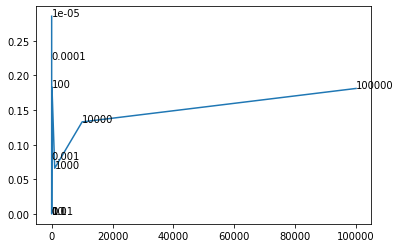


The best value of alpha is 1e-05.
Time taken to run this cell : 0:05:11.038876


In [102]:
# import sklearn.model_selection import cross_val_score
import numpy as np
import sklearn

start = datetime.now()
alpha_lst = [10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5]
micro_f1_scores = []
for alpha_ in alpha_lst:
    classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=alpha_, penalty='l1'))
    cv_scores = sklearn.model_selection.cross_val_score(classifier,final_xtrain_sematic, y_train, cv=3, scoring='f1_micro')
    micro_f1_scores.append(cv_scores.mean())
                                                   
# plot alpha vs micro f1 score
plt.plot(alpha_lst,micro_f1_scores)
for i in range (0,len(alpha_lst)):
    plt.annotate('%s' %alpha_lst[i], xy=(alpha_lst[i],micro_f1_scores[i]))
plt.show()
best_alpha = alpha_lst[np.argmax(micro_f1_scores)]
print('\nThe best value of alpha is %s.' %best_alpha)
print("Time taken to run this cell :", datetime.now() - start)

In [103]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'))
classifier.fit(final_xtrain_sematic, y_train)
predictions = classifier.predict_proba(final_xtest_semantic)

t = 0.2 # threshold value
y_pred_new = (predictions >= t).astype(int)

precision = precision_score(y_test, y_pred_new, average='micro')
recall = recall_score(y_test, y_pred_new, average='micro')
f1 = f1_score(y_test, y_pred_new, average='micro')

print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print("Time taken to run this cell :", datetime.now() - start)

Micro-average quality numbers
Precision: 0.3851, Recall: 0.3988, F1-measure: 0.3918
Time taken to run this cell : 0:00:33.540126


> As we can see we are gettig F1 score of 0.3918

### SVM

In [105]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l2'), n_jobs=-1)
classifier.fit(final_xtrain_sematic, y_train)
predictions = classifier.predict (final_xtest_semantic)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.05293324342548887
Hamming loss  0.045396608719964475
Micro-average quality numbers
Precision: 0.3651, Recall: 0.3788, F1-measure: 0.3718


> As we can see we are getting F1 score of 0.3718

## 3.Applying model with synopsis feature and topic modeling

#### combining synopsis feature with topic modeling feature

In [27]:
print("shape of train and test",x_train1.shape,x_test_1.shape)

shape of train and test (11862, 10000) (2966, 10000)


In [28]:
print("shape of train and test",x_train_keywords.shape,x_test_keywords.shape)

shape of train and test (11862, 40) (2966, 40)


In [29]:
from scipy.sparse import hstack
# Combine all the features in question1 and question2
final_xtrain_topic = hstack((x_train1,x_train_keywords))
final_xtest_topic = hstack((x_test_1,x_test_keywords))

### Logistic Regression

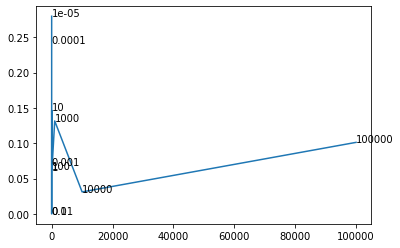


The best value of alpha is 1e-05.
Time taken to run this cell : 0:04:16.190707


In [30]:
# import sklearn.model_selection import cross_val_score
import numpy as np
import sklearn

start = datetime.now()
alpha_lst = [10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5]
micro_f1_scores = []
for alpha_ in alpha_lst:
    classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=alpha_, penalty='l1'))
    cv_scores = sklearn.model_selection.cross_val_score(classifier,final_xtrain_topic, y_train, cv=3, scoring='f1_micro')
    micro_f1_scores.append(cv_scores.mean())
                                                   
# plot alpha vs micro f1 score
plt.plot(alpha_lst,micro_f1_scores)
for i in range (0,len(alpha_lst)):
    plt.annotate('%s' %alpha_lst[i], xy=(alpha_lst[i],micro_f1_scores[i]))
plt.show()
best_alpha = alpha_lst[np.argmax(micro_f1_scores)]
print('\nThe best value of alpha is %s.' %best_alpha)
print("Time taken to run this cell :", datetime.now() - start)

In [31]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'))
classifier.fit(final_xtrain_topic, y_train)
predictions = classifier.predict_proba(final_xtest_topic)

t = 0.2 # threshold value
y_pred_new = (predictions >= t).astype(int)

precision = precision_score(y_test, y_pred_new, average='micro')
recall = recall_score(y_test, y_pred_new, average='micro')
f1 = f1_score(y_test, y_pred_new, average='micro')

print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print("Time taken to run this cell :", datetime.now() - start)

Micro-average quality numbers
Precision: 0.4097, Recall: 0.4192, F1-measure: 0.4143
Time taken to run this cell : 0:00:27.774519


> We are getting F1 score of 0.4143

### SVM

In [32]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l2'), n_jobs=-1)
classifier.fit(final_xtrain_topic, y_train)
predictions = classifier.predict (final_xtest_topic)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.010114632501685773
Hamming loss  0.06111129385063237
Micro-average quality numbers
Precision: 0.3393, Recall: 0.3988, F1-measure: 0.3960


> We are getting F1 score of 0.3960

### Combinig all feature together polarity,semantic text , topic modeling

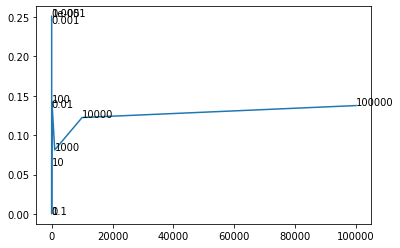


The best value of alpha is 1e-05.
Time taken to run this cell : 0:05:41.109582


In [61]:
# import sklearn.model_selection import cross_val_score
import numpy as np
import sklearn

start = datetime.now()
alpha_lst = [10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5]
micro_f1_scores = []
for alpha_ in alpha_lst:
    classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=alpha_, penalty='l1'))
    cv_scores = sklearn.model_selection.cross_val_score(classifier,final_xtrain, y_train, cv=3, scoring='f1_micro')
    micro_f1_scores.append(cv_scores.mean())
                                                   
# plot alpha vs micro f1 score
plt.plot(alpha_lst,micro_f1_scores)
for i in range (0,len(alpha_lst)):
    plt.annotate('%s' %alpha_lst[i], xy=(alpha_lst[i],micro_f1_scores[i]))
plt.show()
best_alpha = alpha_lst[np.argmax(micro_f1_scores)]
print('\nThe best value of alpha is %s.' %best_alpha)
print("Time taken to run this cell :", datetime.now() - start)

In [62]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'))
classifier.fit(final_xtrain, y_train)
predictions = classifier.predict_proba(final_xtest)

t = 0.2 # threshold value
y_pred_new = (predictions >= t).astype(int)

precision = precision_score(y_test, y_pred_new, average='micro')
recall = recall_score(y_test, y_pred_new, average='micro')
f1 = f1_score(y_test, y_pred_new, average='micro')

print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print("Time taken to run this cell :", datetime.now() - start)

Micro-average quality numbers
Precision: 0.3833, Recall: 0.3788, F1-measure: 0.3810
Time taken to run this cell : 0:00:39.944799


> As we can see when considering all the feature together we are getting F1 score of abt 0.3810

# Conclusion

In [10]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer ","Models","Features" ,"F1 score"]
x.add_row(["TFidf","Logistic Regression",'Polarity & synopsis',0.3875])
x.add_row(["TFidf","SVM",'Polarity & synopsis',0.3708])

x.add_row(['Word2vec','Logistic Regression','Polarity & synopsis',0.3410])
x.add_row(['Word2vec',"SVM",'Polarity & synopsis',0.3337])
x.add_row(["-------","----------","-----------","------"])
x.add_row(["TFidf","Logistic Regression",'Polarity & synopsis',0.3918])
x.add_row(["TFidf","SVM",'Polarity & synopsis',0.3718])
x.add_row(["-------","----------","-----------","------"])
x.add_row(["TFidf","Logistic Regression",'Topic modeling & synopsis',0.4143])
x.add_row(["TFidf","SVM",'Polarity & synopsis',0.3960])
x.add_row(["-------","----------","-----------","------"])
x.add_row(["TFidf","Logistic Regression",'Combining all feature',0.3810])
print (x)

+-------------+---------------------+---------------------------+----------+
| Vectorizer  |        Models       |          Features         | F1 score |
+-------------+---------------------+---------------------------+----------+
|    TFidf    | Logistic Regression |    Polarity & synopsis    |  0.3875  |
|    TFidf    |         SVM         |    Polarity & synopsis    |  0.3708  |
|   Word2vec  | Logistic Regression |    Polarity & synopsis    |  0.341   |
|   Word2vec  |         SVM         |    Polarity & synopsis    |  0.3337  |
|   -------   |      ----------     |        -----------        |  ------  |
|    TFidf    | Logistic Regression |    Polarity & synopsis    |  0.3918  |
|    TFidf    |         SVM         |    Polarity & synopsis    |  0.3718  |
|   -------   |      ----------     |        -----------        |  ------  |
|    TFidf    | Logistic Regression | Topic modeling & synopsis |  0.4143  |
|    TFidf    |         SVM         |    Polarity & synopsis    |  0.396   |

> <b>So for Logistic Regression we are getting high F1 score i.e 0.4143 for topic modeling feature and result might get increase with more data and featurization.</b>

> <b> As we can we are getting better F1 score for Tfidf then the word2vec

## Steps Followed

1. Reading and loadin the data
2. Performing some EDA and analysing tags
3. Pre-processing like removing stopwords,stemming,lemmitization,punctuationn
4. Using Countvectorizer for multilabel tags
5. Vectorizing our text using TFidf Vecorizer
6. Splitting our data into train and test with 0.3 
7. Applying machine learning model 
8. Applied Logistic Regression using cross val score with cv=3 since we have less amt of data.
9. Also tried word2vec from pre-trained model but performance was better for tfidf then the word2vec.
10. Same trying for different different feature
11. Conclusion